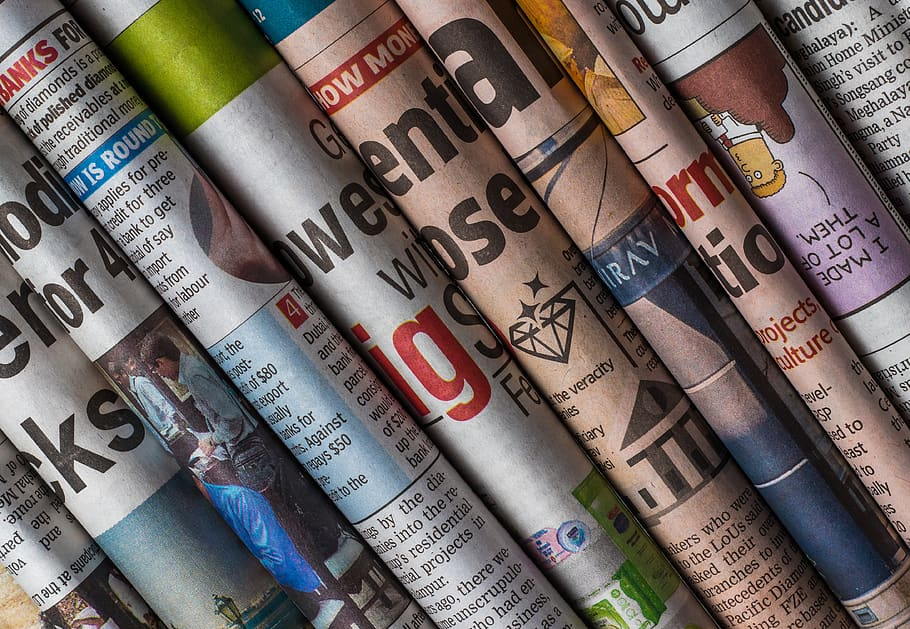

Table of contents:
* [1. Project Overview](#chapter1)
    * [1.1 Meet the team](#section_1_1)
    * [1.2 Introduction](#section_1_2)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA)](#chapter5)
* [6. Train-test splits](#chapter6)
    * [6.1 Model 1](#section_6_1)
    * [6.1 Model 2](#section_6_2)
    * [6.1 Model 3](#section_6_3)
* [7. Model evaluation metrics](#chapter7)
* [8. Model performance analysis](#chapter8)
* [9. Conclusion](#chapter9)
* [10. References](#chapter10)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

### 1.1 Meet the team: <a class="anchor" id="section_1_1"></a>

> - Obed Segwate Mabowa 
    - <mabowaobed98@gmail.com>,

### 1.1 Introduction: <a class="anchor" id="section_1_1"></a>

<b> Objective of the Project:</b>

<b> Data Source:</b>

<b> Importance of the Study:</b>

<b> Key Questions or Hypotheses:</b>

<b> Methodology Overview:</b>

<b> Structure of the Notebook:</b>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>
+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`

In [ ]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the `co2_emissions_from_agri.csv` file. To better manipulate and analyse the `co2_emissions_from_agri.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [ ]:
df_test = pd.read_csv("test.csv", index_col=False)
df_train = pd.read_csv("train.csv", index_col=False)
df_test.head(2)
df_train.head(2)

In [ ]:
# The copy of the dataframe
df_copy = df.copy()
# Displays the number of rows and columns
df_copy.shape

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

Data cleaning is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.

In [ ]:
## Display summary information about the DataFrame.
df_copy.info()

## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.

## 6. Train-test splits <a class="anchor" id="chapter6"></a>

### 6.1 Model 1: <a class="anchor" id="section_6_1"></a>

### 6.2 Model 2: <a class="anchor" id="section_6_2"></a>

### 6.3 Model 3: <a class="anchor" id="section_6_3"></a>

## 7. Model evaluation metrics <a class="anchor" id="chapter7"></a>

## 8. Model performance analysis <a class="anchor" id="chapter8"></a>

## 9. Conclusion <a class="anchor" id="chapter9"></a>

<b> Summary of Key Findings:</b>

<b> Evaluation of the Methodology:</b>

<b> Implications of the Findings:</b>

<b> Suggestions for Future Work:</b>

<b> Reflection on the Data Source and Quality:</b>

<b> Concluding Thoughts:</b>

## 10. References <a class="anchor" id="chapter10"></a>